In [1]:
import sys
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
m = 'ruscorpora_upos_skipgram_300_5_2018.vec.gz'
if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

2018-05-26 10:55:17,849 : INFO : loading projection weights from ruscorpora_upos_skipgram_300_5_2018.vec.gz
2018-05-26 10:59:19,731 : INFO : loaded (195071, 300) matrix from ruscorpora_upos_skipgram_300_5_2018.vec.gz


In [3]:
model.init_sims(replace=True)

2018-05-26 11:00:05,805 : INFO : precomputing L2-norms of word weight vectors


In [9]:
nouns = ["мразь", "сволочь", "идиот", "придурок", "чмо", 
         "быдло", "отморозок", "гадёныш", "душман", "дрянь", 
         "мудила", "негодяй", "скотина", "лох", "подонок", 
         "поганка", "пидор", "пидарас", "козёл", "каналья", 
         "падла", "подстилка", "жлоб", "жмот", "жила", 
         "скупердяй", "скопидом", "жадина", "зараза", 
         "мымра", "подлец", "наглец", "хам", "подонок",
         "шваль", "стерва", "ублюдок", "гад", "оболтус", 
         "обормот", "шлимазл", "раздолбай", "остолоп", 
         "охламон", "паршивец", "прохвост", "хвастун", "хитрец",
         "тварь", "хмырь", "упырь", "буян", "брюзга", "вредина", 
         "гнида", "гондон", "говнюк", "дешёвка", "ехидна", 
         "жаба", "мочалка", "злыдень", "злюка", "изверг", "ирод", 
         "истеричка", "отброс", "истеричка", "мегера", "шлюха", 
         "мракобес", "еретик", "мурдо", "мямля", "нелюдь", 
         "неряха", "нелюдь", "нечестивец", "нюня", "однодневка", 
         "отщепенец", "паразит", "паршивец", "паскуда", "потаскун",
         "потаскуха", "похабник", "пошляк", "проходимец", "врун", 
         "пустобрёх", "развратник", "распутник", "слабак", "слизняк", 
         "собака", "пёс", "шавка", "тля", "торгаш", "тряпка", "урод",
         "хлыщ", "холоп", "шакал", "шушера", "язва", "цаца"]

In [10]:
import networkx as nx
G = nx.Graph()
for noun in nouns:
    if noun + '_NOUN' in model:
        G.add_node(noun)
        
for noun in nouns:
    n = noun + '_NOUN' 
    if n in G:
        G.remove_node(n)

In [11]:
nodelist = G.nodes()
for node1 in nodelist:
    n1 = node1 + '_NOUN'
    for node2 in nodelist:
        n2 = node2 + '_NOUN'
        if node2 != node1:
            sim = model.similarity(n1, n2)
            if sim > 0.5:
                G.add_edge(node1, node2, weight=sim)

In [42]:
nx.write_gexf(G, 'graph_obscene.gexf')

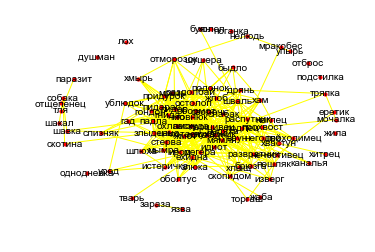

In [12]:
import matplotlib.pyplot as plt 

# для начала надо выбрать способ "укладки" графа. Их много, возьмём для начала такой:
pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='red', node_size=10) 
nx.draw_networkx_edges(G, pos, edge_color='yellow')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='Arial')
plt.axis('off') 
plt.show()

In [43]:
#Вычислите самые центральные слова графа
deg = nx.degree_centrality(G)
i = 0
for nodeid in sorted(deg, key=deg.get, reverse=True): #Вычислите самые центральные слова графа
    if i <= 10:
        i += 1
        print(nodeid)

потаскун
чмо
похабник
сволочь
неряха
пидор
охламон
потаскуха
говнюк
мямля
паскуда


In [ ]:
#Коэффициент кластеризации
print("clusterization: ")
print(nx.average_clustering(G))

In [41]:
#Радиус графа (для каждой компоненты связности) 
for s in nx.connected_components(G):
    sub = G.subgraph(s)
    print(str(s) + ' : ' + str(nx.radius(sub)))

{'ехидна', 'паршивец', 'пидор', 'потаскун', 'хмырь', 'падла', 'оболтус', 'тряпка', 'шавка', 'тварь', 'гнида', 'собака', 'гад', 'торгаш', 'дрянь', 'ублюдок', 'обормот', 'паскуда', 'стерва', 'раздолбай', 'слабак', 'мымра', 'говнюк', 'хам', 'хитрец', 'брюзга', 'потаскуха', 'каналья', 'неряха', 'шакал', 'похабник', 'урод', 'идиот', 'скопидом', 'ирод', 'злюка', 'упырь', 'истеричка', 'проходимец', 'скотина', 'прохвост', 'сволочь', 'еретик', 'пидарас', 'врун', 'остолоп', 'хвастун', 'мракобес', 'придурок', 'жмот', 'отморозок', 'нечестивец', 'мямля', 'шлюха', 'буян', 'жаба', 'наглец', 'изверг', 'охламон', 'шваль', 'жлоб', 'мразь', 'быдло', 'цаца', 'мегера', 'подонок', 'негодяй', 'гондон', 'развратник', 'шушера', 'распутник', 'слизняк', 'пошляк', 'хлыщ', 'злыдень', 'мочалка', 'подлец', 'чмо', 'нелюдь'} : 4
{'душман'} : 0
{'лох'} : 0
{'поганка'} : 0
{'подстилка'} : 0
{'жила'} : 0
{'зараза', 'язва'} : 1
{'отброс'} : 0
{'однодневка'} : 0
{'отщепенец'} : 0
{'паразит', 'тля'} : 1
{'холоп'} : 0
